# EDA

In [90]:
import sys; import os; sys.path.append(os.path.abspath(os.path.join('../..'))); cwd = sys.path[-1]

## Import data

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(22,8)})

In [92]:
train = pd.read_csv(f"{cwd}/data/raw/train.csv")
test = pd.read_csv(f"{cwd}/data/raw/test.csv")
oil = pd.read_csv(f"{cwd}/data/raw/oil.csv")
holidays = pd.read_csv(f"{cwd}/data/raw/holidays_events.csv")
stores = pd.read_csv(f"{cwd}/data/raw/stores.csv")
transacs = pd.read_csv(f"{cwd}/data/raw/transactions.csv")

print ("Training Data Shape: ", train.shape)
print ("Testing Data Shape", test.shape)

Training Data Shape:  (3000888, 6)
Testing Data Shape (28512, 5)


In [93]:
train.head(3)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


In [94]:
assert train.isna().sum().sum() == 0 & test.isna().sum().sum() == 0

## EDA

In [95]:
train['month'] = pd.to_datetime(train['date']).dt.month
train['year'] = pd.to_datetime(train['date']).dt.year

In [96]:
agg = train.groupby(['year', 'month'], as_index=False).agg({"sales":"mean"})
agg['month_year'] = agg['month'].astype (str) + '-' + agg['year'].astype (str)

/home/acaille/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acaille/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acaille/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acaille/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

<Axes: xlabel='month_year', ylabel='sales'>

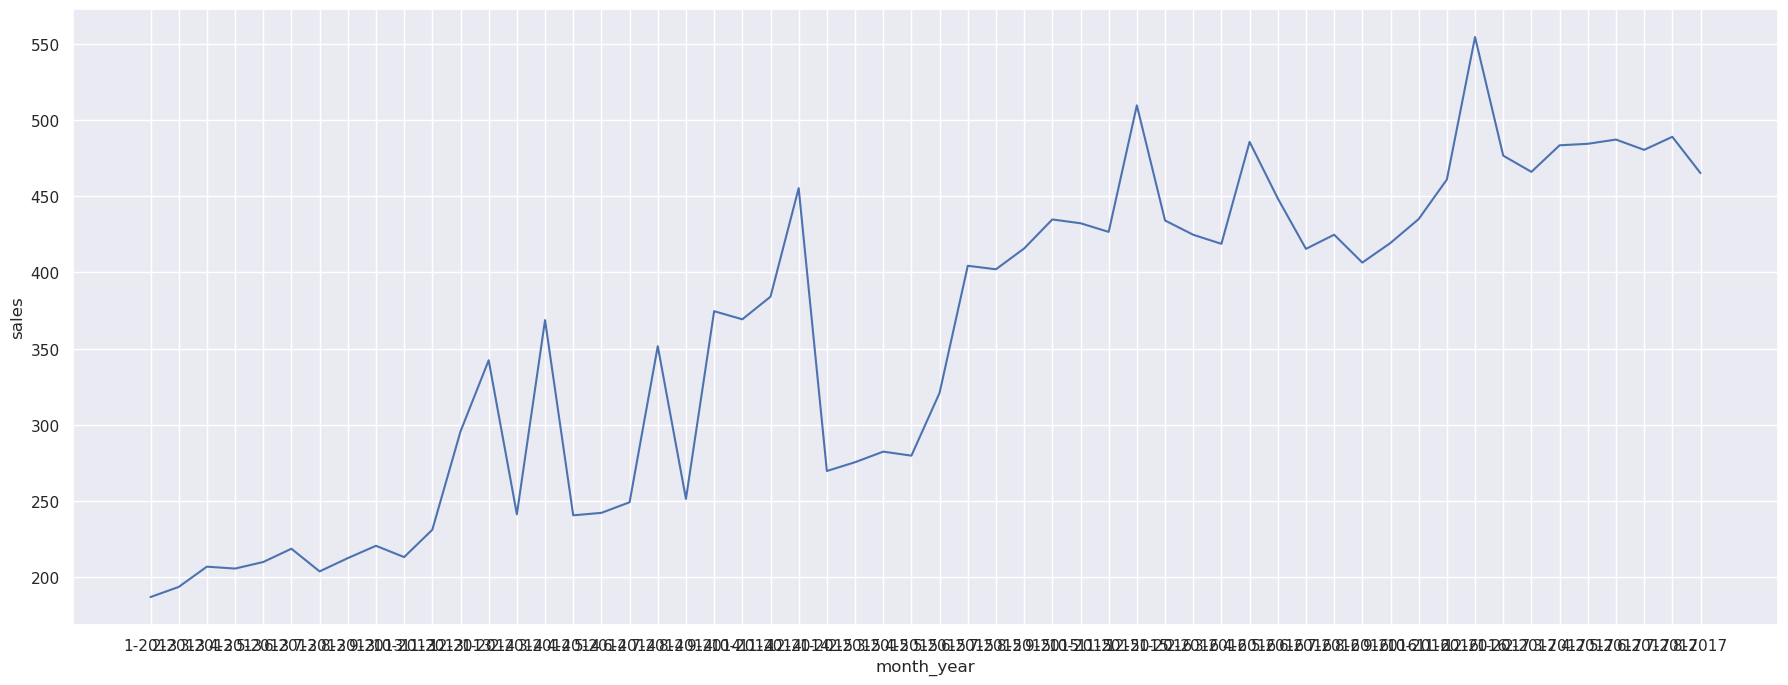

In [97]:
sns.lineplot(data=agg, x="month_year", y="sales")

In [98]:
oil.rename(columns={'dcoilwtico': 'oil_price'}, inplace=True)
oil.isna().sum()

date          0
oil_price    43
dtype: int64

/home/acaille/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acaille/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acaille/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acaille/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

<Axes: xlabel='date', ylabel='oil_price'>

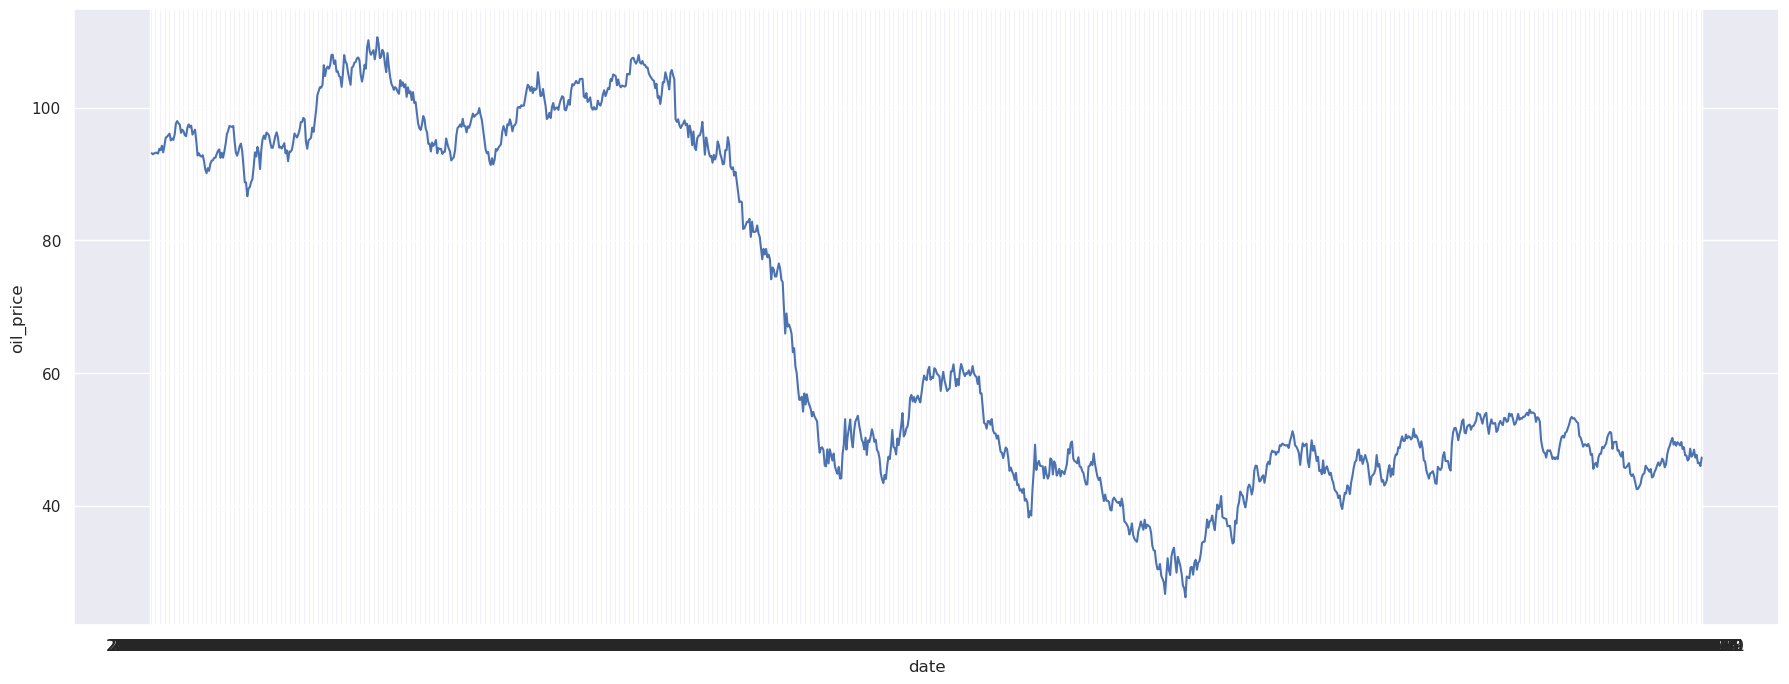

In [99]:
sns.lineplot(data=oil, x='date', y='oil_price')

In [100]:
holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [101]:
holidays[holidays.duplicated(keep=False)]

,date,type,locale,locale_name,description,transferred


In [102]:
def fix_transfered_holidays(df: pd.DataFrame) -> pd.DataFrame:
    """A holiday that is transferred officially falls on that calendar day,
    but was moved to another date by the government. Hence, they are normal days.
    This function fix this.

    Args:
        df (pd.DataFrame): train or test df

    Returns:
        pd.DataFrame: fixed df
    """
    df.loc[df["transferred"], "type"] = "Normal"
    df.loc[df["type"] == "Transfer", "type"] = "Holiday"

    # Since all of the transferred stuff has been dealt with, we will drop the column
    df = df.drop("transferred", axis=1)

    # Brige day can be considered as Holidays
    df.loc[df["type"] == "Bridge", "type"] = "Holiday"

    return df

In [107]:
fix_holidays = fix_transfered_holidays(holidays)
fix_holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
dtype: int64

In [77]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64